# Section 1: Perform Quantum Operations
## 1.1 Define Pauli Operators

In [36]:
import qiskit.quantum_info as qi

# Method 1: Create Pauli operator from string
pauli1 = qi.Pauli('XZ') #'XZ' = X on qubit 1, Z on qubit 0 (little-endian)
#Note: Can also create from another Pauli object, ScalarOp, or QuantumCircuit with only Pauli gates (copy constructor).

# Method 2: Create from matrix (Z-gate, X-gate)
pauli2 = qi.Pauli(([0, 1], [0, 1])) # We apply Z & X = Y on qubit 1, nothing on qubit 0, thus the string 'YI'.

print(pauli1)
print(pauli2)

XZ
YI


## 1.2 Apply Quantum Operations
this section prolly needs some more work

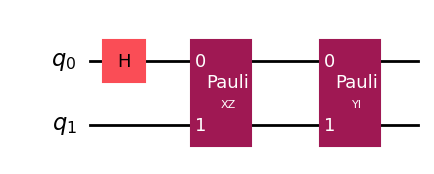

In [46]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)

qc.append(pauli1.to_instruction(), [0, 1])
qc.append(pauli2.to_instruction(), [0, 1])

qc.draw('mpl')

# Section 2: Visualize quantum circuits, measurements, and states
## 2.1 Visualize Quantum Circuits

In [47]:
print(qc)

     ┌───┐┌────────────┐┌────────────┐
q_0: ┤ H ├┤0           ├┤0           ├
     └───┘│  Pauli(XZ) ││  Pauli(YI) │
q_1: ─────┤1           ├┤1           ├
          └────────────┘└────────────┘


In [48]:
qc.draw()

┌───┐┌────────────┐┌────────────┐
q_0: ┤ H ├┤0           ├┤0           ├
     └───┘│  Pauli(XZ) ││  Pauli(YI) │
q_1: ─────┤1           ├┤1           ├
          └────────────┘└────────────┘

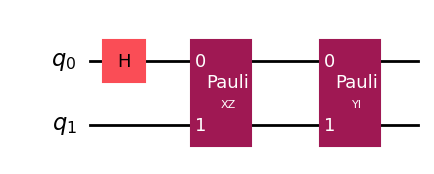

In [49]:
qc.draw('mpl', filename='test-circuit.png') #Save file as well

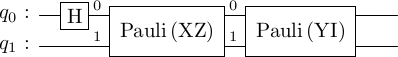

In [50]:
qc.draw('latex')

## 2.2 Visualize Quantum Measurements

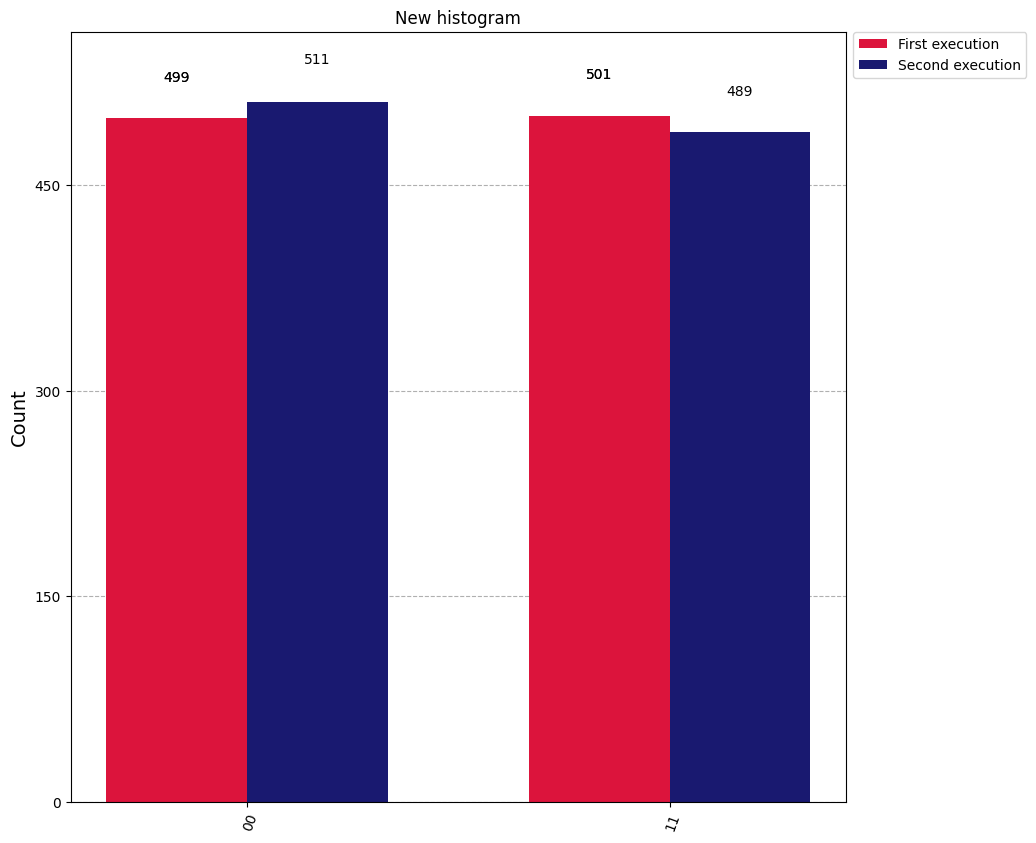

In [31]:
from qiskit.visualization import plot_histogram
 
counts1 = {'00': 499, '11': 501}
counts2 = {'00': 511, '11': 489}
data = [counts1, counts2]
 
legend = ['First execution', 'Second execution']
title = 'New histogram'
figsize = (10,10)
color=['crimson','midnightblue']
plot_histogram(data, legend=legend, title=title, figsize=figsize, color=color)

Statevector([0.-0.70710678j, 0.+0.70710678j, 0.+0.j        ,
             0.+0.j        ],
            dims=(2, 2))
DensityMatrix([[ 0.5+0.j, -0.5+0.j,  0. +0.j,  0. +0.j],
               [-0.5+0.j,  0.5+0.j,  0. +0.j,  0. +0.j],
               [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
               [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j]],
              dims=(2, 2))


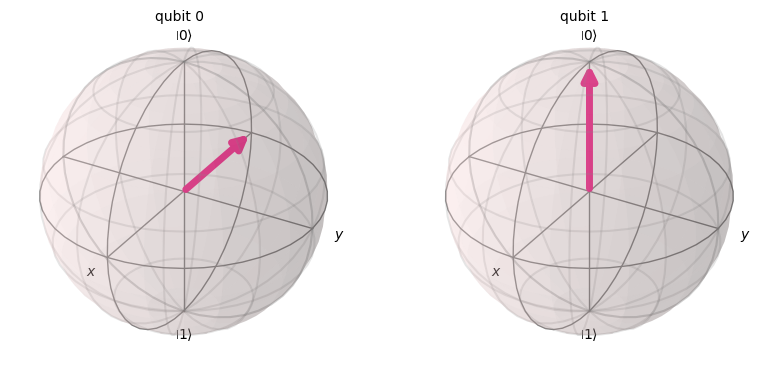

In [ ]:
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_state_city

state = Statevector(qc)
print(state)
matrix = DensityMatrix(qc)
print(matrix)
plot_state_city(state)

## 2.3 Visualize Quantum States

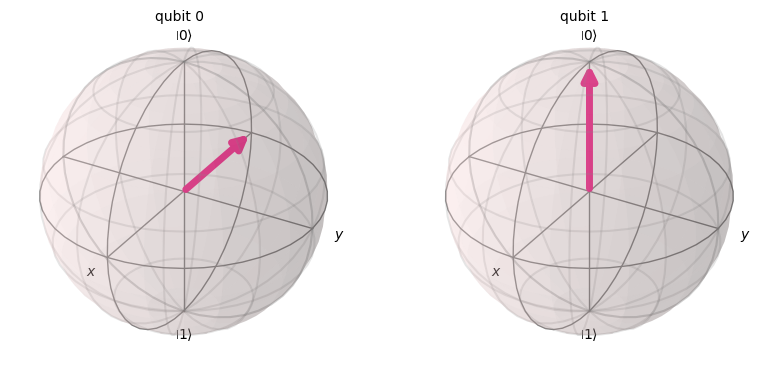

In [53]:
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

plot_bloch_multivector(state) #plot_bloch_vector for single qubit

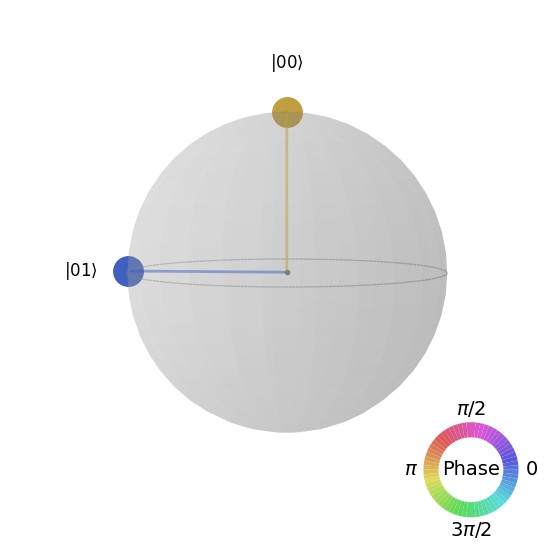

In [54]:
plot_state_qsphere(state)

# Section 3: Create Quantum Circuits
## 3.1 Construct dynamic circuits
mb add: check which backends support dynamic circuits??

In [ ]:
# if statement & with statement

circuit = QuantumCircuit(1, 1)
 
circuit.h(0)
# Use MidCircuitMeasure() if it's supported by the backend.
# circuit.append(MidCircuitMeasure(), [q0], [c0])
circuit.measure(0, 0)

# conditional operation if the measurement was 1
with circuit.if_test((0, 1)): # if classical bit 0 is 1
    circuit.x(0)
circuit.measure(0, 0) #measure qubit 0 -> classical bit 0
circuit.draw("mpl")

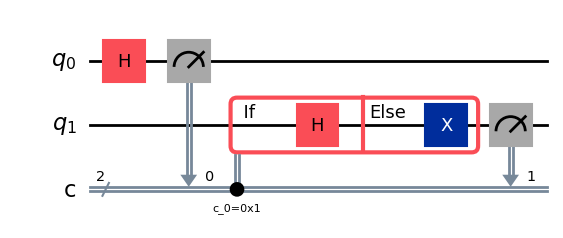

In [ ]:
# example with else statement

circuit = QuantumCircuit(2, 2)
 
circuit.h(0)
circuit.measure(0, 0)
with circuit.if_test((0, 1)) as else_:
    circuit.h(1)
with else_:
    circuit.x(1)
circuit.measure(1, 1)
 
circuit.draw("mpl")

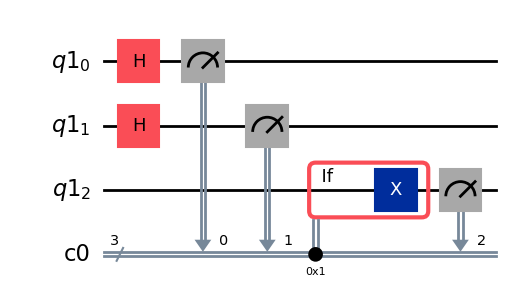

In [ ]:
from qiskit.circuit import QuantumRegister, ClassicalRegister

qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.if_test((clbits, 0b001)): #qubit 0 is 1, qubit 1 is 0
    circuit.x(q2)
circuit.measure(q2, c2)
 
circuit.draw("mpl")

## 3.2 Construct Parameterized Circuits

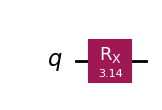

In [ ]:
from qiskit.circuit import Parameter

# Parameter

# create the parameter -- allows to quickly modify the circuit later
phi = Parameter("phi")
qc = QuantumCircuit(1)
 
# parameterize the rotation
qc.rx(phi, 0)
qc.draw("mpl")
 
# bind the parameters after circuit to create a bound circuit
bc = qc.assign_parameters({phi: 3.14})
bc.draw("mpl")

Transpile w/ pass manager